# 스무딩 실습

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### 시계열 데이터, 데이터 프레임, 원본 시계열 데이터 시각화 

         Date      Value
0  2023-01-01   4.967142
1  2023-01-02  -1.382643
2  2023-01-03   6.476885
3  2023-01-04  15.230299
4  2023-01-05  -2.341534
..        ...        ...
95 2023-04-06 -14.635149
96 2023-04-07   2.961203
97 2023-04-08   2.610553
98 2023-04-09   0.051135
99 2023-04-10  -2.345871

[100 rows x 2 columns]


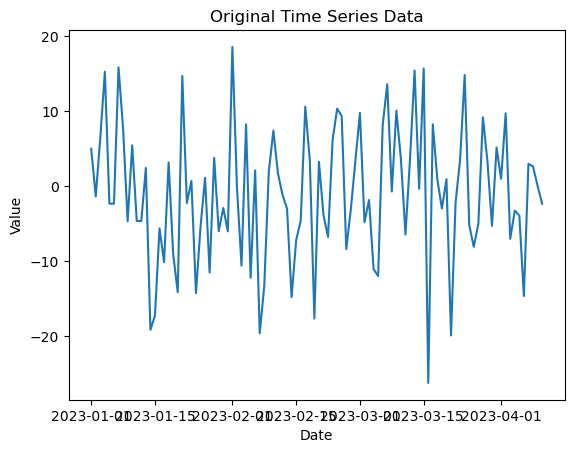

In [2]:
np.random.seed(42)
dates =  pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성 

data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

### 이동평균을 사용한 스무딩 

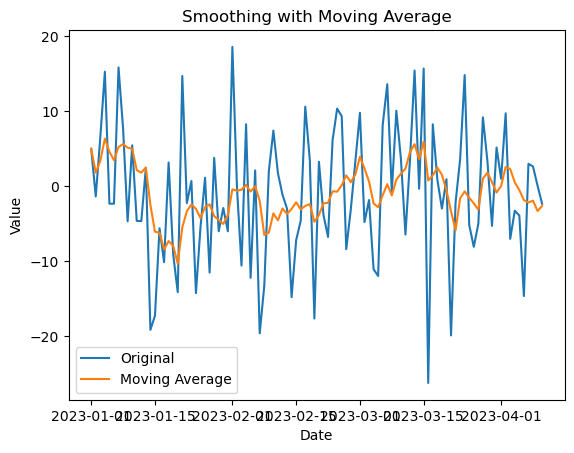

In [3]:
# 이동평균 윈도우 크기 설정 
window_size = 7 

# 이동평균 계산 
data['MovingAverage'] = data['Value'].rolling(window=window_size, min_periods=1).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.legend()
plt.show()

### 스무딩 --> 지수평활법

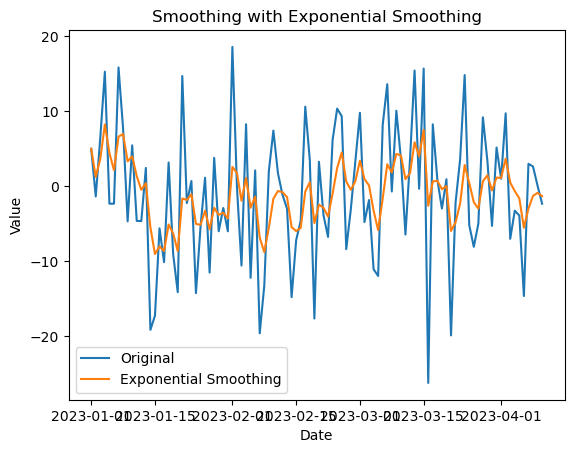

In [4]:
alpha = 0.3 

# 지수평활법 계산 
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.show()

In [1]:
# 데이터가 긴 시간 변하지 않은 경우 -> 이동평균
# 데이터가 짧은 시간동안 빠르게 변화하거나 최신 정보에 더 관심이 있는 경우 -> 지수평활법